Read Data

In [7]:
import numpy as np
import pandas as pd

df = pd.read_csv('./weatherAUS.csv')
print('Size of weather data frame is :',df.shape)
#Let us see how our data looks like!
df[0:5]

Size of weather data frame is : (145460, 24)


Date Location  MinTemp  ...  RainToday  RISK_MM  RainTomorrow
0  2008-12-01   Albury     13.4  ...         No      0.0            No
1  2008-12-02   Albury      7.4  ...         No      0.0            No
2  2008-12-03   Albury     12.9  ...         No      0.0            No
3  2008-12-04   Albury      9.2  ...         No      1.0            No
4  2008-12-05   Albury     17.5  ...         No      0.2            No

[5 rows x 24 columns]

In [8]:
df.shape

(145460, 24)

Drop RISK_MM column

In [0]:
df.drop(columns=['RISK_MM'], axis = 1, inplace = True)

In [10]:
df.shape

(145460, 23)

# Data Pruning
### 1. Deal with Nan & null values
Count null values

In [11]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Few columns such as Sunshine, Evaporation, Cloud9am, Cloud3pm have greater than 50000 null values which is almost 33% or more. We can either **ignore** these columns or **fill** the NaN values with some dummy values. Here, we will these drop the features.  
 
Below, we are using ExtraTreesClassifier to derive feature importance of the above four features, for comparison we take few other features into consideration

(145460, 23)
(142193, 23)
(142193, 4)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


[0.35633876 0.40902111 0.13694866 0.09769147]


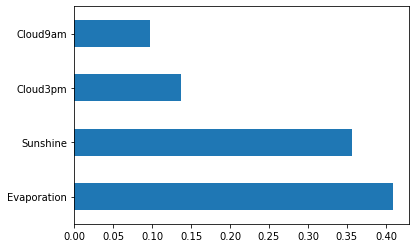

In [12]:
columns=['Sunshine','Evaporation','Cloud3pm','Cloud9am']

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
print(df.shape)
model = ExtraTreesClassifier()
df = df.dropna(axis=0, subset=['RainTomorrow'])
print(df.shape)
X = df[columns].fillna(df.mean(), axis=0)
y = df[['RainTomorrow']]
print(X.shape)
model.fit(X, y)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

Clearly we can drop sunshine and evaporation are two important features, but the fact to notice is that these metrics are obtained after dropping NA values and looking at the shape it is clear that we have lost 2/3s of the data. But we could still remove cloud features and try.

In [13]:
columns=['Sunshine','Evaporation']

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
y = df.dropna(axis=0, subset=['RainTomorrow'])
y = y[['RainTomorrow']]
X = df[columns].dropna(axis=0)
print(X.shape)
model.fit(X, y)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

(70418, 2)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


ValueError: ignored

Again there is heavy loss of data. Hence, it would be prudent to drop these features.

In [14]:
## Drop Null valued columns
df.drop(columns=['Sunshine','Evaporation','Cloud3pm','Cloud9am'], axis=1, inplace = True)
print(df.columns.values)

['Date' 'Location' 'MinTemp' 'MaxTemp' 'Rainfall' 'WindGustDir'
 'WindGustSpeed' 'WindDir9am' 'WindDir3pm' 'WindSpeed9am' 'WindSpeed3pm'
 'Humidity9am' 'Humidity3pm' 'Pressure9am' 'Pressure3pm' 'Temp9am'
 'Temp3pm' 'RainToday' 'RainTomorrow']


Other columns do have null values in them, we could either ignore the rows or substitute them mean values of the column. We can try both approaches, first dropping the rows.

1. Some columns as RainToday, Rain Tomorrow are non-numeric columns, while substituting the NaN values by mean, we can first change the values to 0 and 1. 

*Dropping rows with Rain Tomorrow = NA values as these rows not useful intraining or testing.*

In [0]:
df.dropna(axis=0, subset=['RainTomorrow'], inplace=True)

### 1.1 Handling binary data

In [0]:
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

Now susbtituing values

In [0]:
# Prefill missing values with mean
df.fillna(df.mean(), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)
# Drop rows with null values
# df.dropna(how='any', inplace=True)
# df.shape

Dropping null valued rows (null in any column) resulted in 2/3 loss of data.

#### Should we do Z-score to remove outliers?

Currently, we will keep the outliers, we can also check with removing the outliers.

### 2. Handle Date value
We must change date variable and split it to month, year, date. It would be interesting to check if month, year & day possibly have any correlation with the result.

In [0]:
df['Date'] = pd.to_datetime(df['Date'])

# Extract date components
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Drop date column
df.drop('Date', axis=1, inplace = True)

### 3. Handling categorical data

There are number of columns which have categorical data for eg:- WindGustDir, Location. This data needs to be represented such as it is palapable to the models. Hence, we encode these data columns as one hot vector, by adding an additional columns. We will not be using Label Encoder as experimenting with it showed that it decreases the f-1 score

In [0]:
categorical_columns = ['WindGustDir', 'WindDir3pm', 'WindDir9am', 'Location']
#df_ohe = pd.get_dummies(df, columns=categorical_columns) #, dummy_na=True
#df_ohe.info()
# TODO: Check categorical data for unique values
from sklearn import preprocessing 

#df.fillna(df.mode().iloc[0], inplace=True)
df_le = df.apply(preprocessing.LabelEncoder().fit_transform)
df_le[0:5]
df = df_le #df_ohe

# Feature Scaling
Feature domination for eg:- Pressure might dominate temperature from above sample.
There are few scaling methods that can scale data reduce feature domination. 

1. Standard Scalar: scales features to -1 to 1 range with 0 mean.
2. MinMax Scalar: scales to 0 to 1 range.
3. QuantileTransformer: Fits data onto a normal distribution and reduces the effects of outliers
4. PowerTransformer: Fits data onto a Gaussian distribution.

Before, we proceed, it would be a good excercise to get some statistical analysis on features.

In [20]:
df.describe()

Location        MinTemp  ...            Day          Month
count  142193.000000  142193.000000  ...  142193.000000  142193.000000
mean       23.740655     201.352992  ...      14.715084       5.402544
std        14.237503      64.295257  ...       8.798150       3.426506
min         0.000000       0.000000  ...       0.000000       0.000000
25%        11.000000     155.000000  ...       7.000000       2.000000
50%        24.000000     199.000000  ...      15.000000       5.000000
75%        36.000000     248.000000  ...      22.000000       8.000000
max        48.000000     389.000000  ...      30.000000      11.000000

[8 rows x 20 columns]

#### Inference :
It is clear from the std deviation that most of the data points are well surrounded around the mean. Scaling techniques like MinMacScalar might accidently include the influence of outliers. Nonetheless, we experiment with  
1. Standard Scalar
2. Quantile Transformer
3. MinMax Scalar

Currently, as data contains one hot encoding it would be great to use MinMaxScalar. But we could essentially apply different transformation on categorical versus numerical data.

For simplicity, we first experiment with MinMaxScalar.

In [0]:
from sklearn import preprocessing

#scaler = preprocessing.StandardScaler()  # stnadard sclaer will scale some properties of one hot encoded data as well
#scaler = preprocessing.QuantileTransformer() #(ignore_implicit_zeros=True) if used on one-hot encoded
scaler = preprocessing.MinMaxScaler()
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df), index=df.index, columns=df.columns)

### Scaled Data

In [22]:
df.iloc[0:10]

Location   MinTemp   MaxTemp  ...  RainTomorrow       Day  Month
0  0.041667  0.550129  0.518812  ...           0.0  0.000000    1.0
1  0.041667  0.393316  0.564356  ...           0.0  0.033333    1.0
2  0.041667  0.537275  0.576238  ...           0.0  0.066667    1.0
3  0.041667  0.439589  0.621782  ...           0.0  0.100000    1.0
4  0.041667  0.655527  0.706931  ...           0.0  0.133333    1.0
5  0.041667  0.580977  0.655446  ...           0.0  0.166667    1.0
6  0.041667  0.573265  0.562376  ...           0.0  0.200000    1.0
7  0.041667  0.401028  0.596040  ...           0.0  0.233333    1.0
8  0.041667  0.452442  0.699010  ...           1.0  0.266667    1.0
9  0.041667  0.542416  0.663366  ...           0.0  0.300000    1.0

[10 rows x 20 columns]

# Feature Selection
There are multitude of methods for feature selection.
1. Univariate feature selection
2. Pearson's co-efficient
3. PCA
4. Recurssive feature elimination with cross validation

In [23]:
from sklearn.feature_selection import SelectKBest, chi2
X = df.loc[:,df.columns!='RainTomorrow']
y = df[['RainTomorrow']]
selector = SelectKBest(chi2, k=19)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)]) #top 3 columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'Day', 'Month'],
      dtype='object')


# Split into Train / Test data

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

## Training
1. Select models and apply hyper parameters.
2. Use ross validation (k-fold).
//explain
3. Use GridSearch CV
//explain

## Logistic Regression
### Train
About Hyper-Parameters
1. Trying both l1 & l2 regularization penalty
2. Balanced weights as classes are unbalanced

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
#clf_logreg = LogisticRegression(random_state=0, class_weight='balanced', C=100)
#clf_logreg.fit(X_train,y_train)

## Hyper parameters

hyperparameters = dict(
    C=np.logspace(0, 2, 4, 8),     # regularization penalty 
    penalty=['l1', 'l2'],        # regularization hyperparameter
    tol=np.logspace( 2, 4),
    solver=['liblinear', 'saga'],# solvers to use
    class_weight=['balanced'],
    n_jobs=[-1])                   # use all cpus 
"""
hyperparameters=dict()           # dry run
"""
clf = GridSearchCV(LogisticRegression(), hyperparameters, cv=3, verbose=0)

#### Train and print best model

In [0]:
best_model = clf.fit(X_train, y_train)
print("Best parameters set found on development set:")
print()
print(best_model.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/usr/local

### Test & F1 score, Accuracy

In [28]:
from sklearn.metrics import classification_report
y_pred = best_model.predict(X_test)
report = classification_report(y_test,y_pred, labels=[0.0, 1.0])
print('Report :\n',report)

Report :
               precision    recall  f1-score   support

         0.0       0.92      0.79      0.85     27609
         1.0       0.51      0.75      0.61      7940

    accuracy                           0.78     35549
   macro avg       0.71      0.77      0.73     35549
weighted avg       0.83      0.78      0.79     35549



## Decision Trees
### Train
About Hyper-Parameters


In [0]:
#Decision Tree Classifier
from sklearn.ensemble import GradientBoostingClassifier
#from imblearn.pipeline import Pipeline
#from imblearn.over_sampling import SMOTE

## Hyper parameters
hyperparameters = dict()

#model = Pipeline([
#        ('sampling', SMOTE()),  ## Dry run
#        ('classification', GradientBoostingClassifier())
#    ])
model = GradientBoostingClassifier()
clf = GridSearchCV(model, hyperparameters, cv=3, verbose=0)

### Train and print best model

In [30]:
best_model = clf.fit(X_train, y_train)
print("Best parameters set found on development set:")
print()
print(best_model.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

Best parameters set found on development set:

{}


### Test & F1 score, Accuracy

In [31]:
from sklearn.metrics import classification_report
y_pred = best_model.predict(X_test)
score = classification_report(y_test,y_pred, labels=[0.0, 1.0])
print('Accuracy :',score)

Accuracy :               precision    recall  f1-score   support

         0.0       0.86      0.95      0.91     27609
         1.0       0.73      0.48      0.58      7940

    accuracy                           0.85     35549
   macro avg       0.80      0.72      0.74     35549
weighted avg       0.84      0.85      0.83     35549



**Thus, GradientBoostedTrees have a higher recall for class 0 ( not raining ) and lower f1score for label 1.0 than LogisticReegrssion.**